In [1]:
%matplotlib inline
import math
import pandas as pd
import pylab as p
alpha = 0.05
unordered_nominal_columns = ['Most_Important_Issue', 'Main_transportation', 'Occupation']


def convert_to_bool(df, *column_names):
    for column_name in column_names:
        df[column_name] = df[column_name].map(lambda x: 1 if x == "Yes" else (0 if x == 'No' else None))


def identify_and_set_correct_types(df):
    # boolean columns: Looking_at_poles_results Married Will_vote_only_large_party Financial_agenda_matters Voting_Time Gender
    convert_to_bool(df, 'Looking_at_poles_results', 'Married', 'Will_vote_only_large_party', 'Financial_agenda_matters')
    df['Gender'] = df['Gender'].map(lambda x: 1 if x == 'Male' else (0 if x == 'Female' else None))

    # Ordered nominal columns: Age_group
    df['Age_group'] = df['Age_group'].map(lambda x: 1 if x == "Below_30" else (2 if x == "30-45" else (3 if x == "45_and_up" else None)))
    df['Age_group'] = df['Age_group'].astype('category', ordered=True)
    df['Voting_Time'] = df['Voting_Time'].map(lambda x: 1 if x == 'By_16:00' else (2 if x == 'After_16:00' else None))
    df['Voting_Time'] = df['Voting_Time'].astype('category', ordered=True)

#     for col in unordered_nominal_columns:
#         df[col] = df[col].astype('category', ordered=False)

    return df


def nominal_to_numeric(df):
    # we are losing the missing data here
    for col in unordered_nominal_columns:
        partial = pd.get_dummies(df[col], col, '_')
        df = df.join(partial)
        del df[col]
    return df


def print_missing_values(df):
    print '\n\nMissing values:'
    for col in df.columns.values:
        misCount = df[col].isnull().sum()
        if misCount > 0:
            print '%s: %s missing values' % (col, misCount)


def data_imputation(df):
    # method='nearset'
    #return df.interpolate(method='linear')

#   # median
#    for col in df.columns.values:
#        df[col] = df[col].fillna(df[col].median())
        
    return df

def plot_log_density_function(df, column):
    plot_density_function(df, column, lambda x: math.log(x))


def plot_density_function(df, column, trans=lambda x: x):
    df[column].plot(kind='kde')    
    # p.savefig('foo.png')
    # p.clf()
    p.show()


In [2]:
df = pd.read_csv('./dataset/ElectionsData.csv')
# df = identify_and_set_correct_types(df)
df.dropna(inplace=True)
df.describe()


,Occupation_Satisfaction,Avg_monthly_expense_when_under_age_21,AVG_lottary_expanses,Avg_Residancy_Altitude,Yearly_ExpensesK,Financial_balance_score_(0-1),%Of_Household_Income,Avg_government_satisfaction,Avg_education_importance,Avg_environmental_importance,...,Avg_size_per_room,Weighted_education_rank,%_satisfaction_financial_policy,Garden_sqr_meter_per_person_in_residancy_area,Last_school_grades,Number_of_differnt_parties_voted_for,Political_interest_Total_Score,Number_of_valued_Kneset_members,Overall_happiness_score,Num_of_kids_born_last_10_years
count,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000,...,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000
mean,5.521180,444.880470,74052.534755,148.293490,506.570169,0.503743,0.497976,4.979805,4.980646,4.945780,...,24.767447,819001.020307,50.095022,34272.714537,72.864838,1.994368,952.243446,10.481268,680.223839,0.689765
std,2.869735,330.340002,61917.142758,110.113334,172.404935,0.288324,0.286469,2.892392,2.898338,2.889963,...,3.230392,341495.930621,28.884903,55711.588576,20.197879,1.267355,178.224152,5.771570,154.123060,1.075221
min,1.000000,-394.030092,-81744.489527,-131.343364,0.349801,0.000193,0.000021,0.000616,0.000258,0.000580,...,1.070541,524.288150,0.005066,13.097572,30.000000,0.000000,29.055030,1.000000,3.153985,0.000000
25%,3.000000,196.448728,30020.492226,65.482909,402.951062,0.255969,0.249368,2.452850,2.467503,2.439931,...,23.956869,659876.831126,25.137525,4389.120819,60.000000,1.000000,875.080861,5.000000,610.799487,0.000000
50%,6.000000,365.139384,57808.027114,121.713128,445.945615,0.504244,0.496565,4.978188,4.944264,4.956069,...,24.674333,742475.977090,50.486613,14953.597901,70.000000,2.000000,945.740652,11.000000,680.964899,0.000000
75%,8.000000,622.052593,100501.179351,207.350864,596.617700,0.752151,0.742686,7.452653,7.523308,7.394469,...,25.896559,900862.356499,75.147797,43211.732016,90.000000,3.000000,1022.346527,15.000000,771.114540,1.000000
max,10.000000,2290.716172,640346.644820,763.572057,1000.000000,0.999966,0.999926,9.999888,9.999543,9.999985,...,31.622777,2002009.297226,99.974064,583815.858711,100.000000,7.000000,1499.648613,20.000000,999.999049,10.000000


#### Remove not possible values

In [3]:
df=df[df['Avg_monthly_expense_when_under_age_21']>=0]
df=df[df['AVG_lottary_expanses']>=0]
df.describe()

,Occupation_Satisfaction,Avg_monthly_expense_when_under_age_21,AVG_lottary_expanses,Avg_Residancy_Altitude,Yearly_ExpensesK,Financial_balance_score_(0-1),%Of_Household_Income,Avg_government_satisfaction,Avg_education_importance,Avg_environmental_importance,...,Avg_size_per_room,Weighted_education_rank,%_satisfaction_financial_policy,Garden_sqr_meter_per_person_in_residancy_area,Last_school_grades,Number_of_differnt_parties_voted_for,Political_interest_Total_Score,Number_of_valued_Kneset_members,Overall_happiness_score,Num_of_kids_born_last_10_years
count,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,...,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000
mean,5.522956,446.468968,74321.716110,148.822989,506.541709,0.503540,0.498063,4.982672,4.979372,4.945439,...,24.766381,818976.248267,50.108953,34356.545844,72.838203,1.994108,952.181322,10.479254,680.166733,0.689786
std,2.870142,329.330048,61774.731444,109.776683,172.418320,0.288304,0.286474,2.892573,2.899884,2.889516,...,3.233278,341751.947436,28.891508,55763.009320,20.203327,1.266159,178.385937,5.771939,154.175791,1.075030
min,1.000000,3.988911,44.957092,1.329637,0.349801,0.000193,0.000021,0.000616,0.000258,0.000580,...,1.070541,524.288150,0.005066,13.097572,30.000000,0.000000,29.055030,1.000000,3.153985,0.000000
25%,3.000000,198.312808,30209.803690,66.104269,403.090898,0.255858,0.249304,2.460754,2.466062,2.440019,...,23.957544,659979.428242,25.176596,4445.878947,60.000000,1.000000,875.068070,5.000000,610.950290,0.000000
50%,6.000000,366.621173,57927.372083,122.207058,445.909060,0.503419,0.496640,4.983254,4.943491,4.956069,...,24.673545,742408.532152,50.469529,15066.772072,70.000000,2.000000,945.653768,11.000000,680.877369,0.000000
75%,8.000000,623.146085,100656.179475,207.715362,596.228952,0.752043,0.742688,7.458120,7.522793,7.394158,...,25.892530,900211.299493,75.171680,43363.387509,90.000000,3.000000,1022.235209,15.000000,770.758095,1.000000
max,10.000000,2290.716172,640346.644820,763.572057,1000.000000,0.999966,0.999926,9.999888,9.999543,9.999985,...,31.622777,2002009.297226,99.974064,583815.858711,100.000000,7.000000,1499.648613,20.000000,999.999049,10.000000


In [4]:
import numpy as np
# Identify which of the orginal features are objects
ObjFeat=df.keys()[df.dtypes.map(lambda x: x=='object')]

# Transform the original features to categorical
# Creat new 'int' features, resp.

for f in ObjFeat:
    df[f] = df[f].astype("category")
    df[f+"Int"] = df[f].cat.rename_categories(range(df[f].nunique())).astype(int)
    df.loc[df[f].isnull(), f+"Int"] = np.nan #fix NaN conversion
    df[f]=df[f+"Int"]
    del df[f+"Int"]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8146 entries, 0 to 9998
Data columns (total 38 columns):
Vote                                             8146 non-null float64
Occupation_Satisfaction                          8146 non-null float64
Avg_monthly_expense_when_under_age_21            8146 non-null float64
AVG_lottary_expanses                             8146 non-null float64
Most_Important_Issue                             8146 non-null float64
Avg_Residancy_Altitude                           8146 non-null float64
Looking_at_poles_results                         8146 non-null float64
Yearly_ExpensesK                                 8146 non-null float64
Married                                          8146 non-null float64
Gender                                           8146 non-null float64
Voting_Time                                      8146 non-null float64
Financial_balance_score_(0-1)                    8146 non-null float64
%Of_Household_Income                     

### Convert to Numpy array

In [6]:
df_X_noNaN = df.drop(['Vote'], axis=1).values
df_Y_noNaN = df.Vote.values

## Filters (Features Selection)

In [7]:
all_features = list(df.columns)
all_features.remove('Vote')
features_to_keep=[]

### Applying chi2 for nominal values:

In [8]:
from sklearn.feature_selection import chi2
v=chi2(df_X_noNaN, df_Y_noNaN)[1]
i=0
for c in all_features:
    if c in ObjFeat:
        print  str(v[i]) +": " + c
        if v[i]<alpha:
            features_to_keep.append(c)            
    i+=1

0.0: Most_Important_Issue
0.0: Looking_at_poles_results
2.11157371268e-116: Married
0.979486951977: Gender
0.543189363847: Voting_Time
2.5239068613e-76: Will_vote_only_large_party
0.628214501735: Age_group
0.25193533582: Main_transportation
0.0657004618364: Occupation
0.0: Financial_agenda_matters


In [9]:
features_to_keep

['Most_Important_Issue',
 'Looking_at_poles_results',
 'Married',
 'Will_vote_only_large_party',
 'Financial_agenda_matters']

### Now we would like to apply ANOVA for the numeric values
but there are 2 assumptions:
- The distribution in each group is normal.
- The variance in each group is the same.

#### Testing for normal distribution:

0.0: Occupation_Satisfaction
0.0: Avg_monthly_expense_when_under_age_21
0.0: AVG_lottary_expanses
0.0: Avg_Residancy_Altitude
0.0: Yearly_ExpensesK
2.10194769649e-44: Financial_balance_score_(0-1)


/Users/Itay/miniconda2/lib/python2.7/site-packages/scipy/stats/morestats.py:1082: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


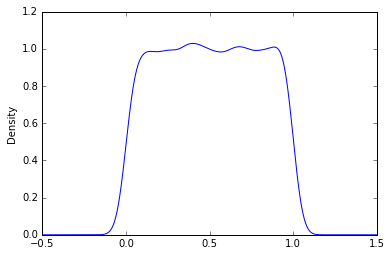

1.07899981753e-43: %Of_Household_Income


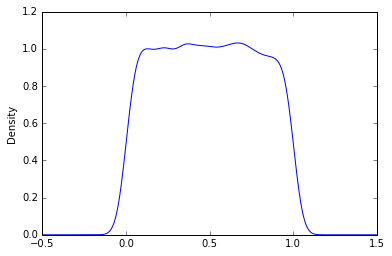

1.12103877146e-44: Avg_government_satisfaction


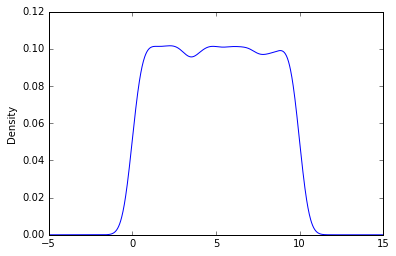

5.6051938573e-45: Avg_education_importance


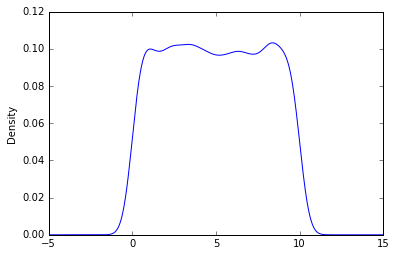

2.80259692865e-44: Avg_environmental_importance


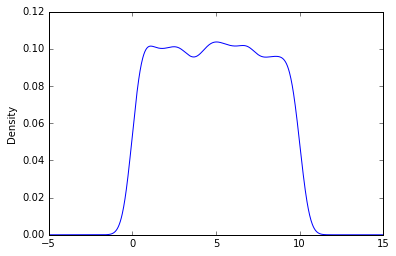

6.86636247519e-44: Avg_Satisfaction_with_previous_vote


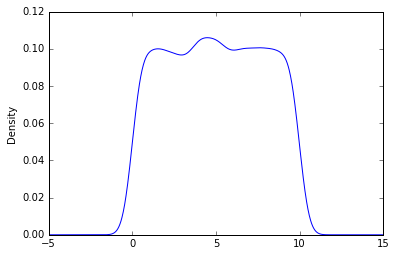

3.78350585368e-44: Avg_monthly_income_all_years


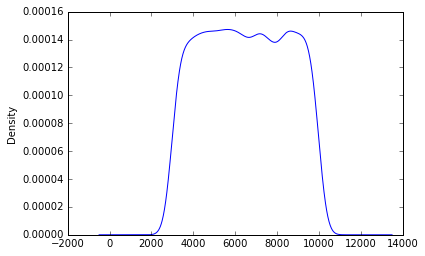

2.38220738935e-44: %Time_invested_in_work


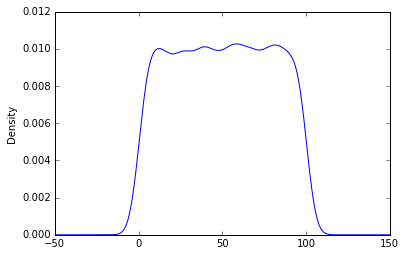

0.0: Yearly_IncomeK
0.0: Avg_monthly_expense_on_pets_or_plants
0.0: Avg_monthly_household_cost
0.0: Phone_minutes_10_years
0.0: Avg_size_per_room
0.0: Weighted_education_rank
1.26116861789e-44: %_satisfaction_financial_policy


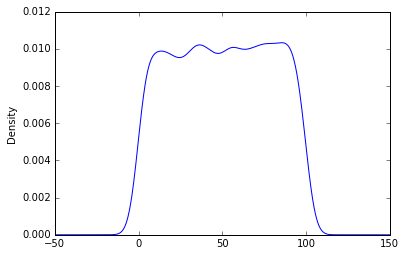

0.0: Garden_sqr_meter_per_person_in_residancy_area
0.0: Last_school_grades
0.0: Number_of_differnt_parties_voted_for
0.0: Political_interest_Total_Score
0.0: Number_of_valued_Kneset_members
0.0: Overall_happiness_score
0.0: Num_of_kids_born_last_10_years


In [10]:
from scipy.stats import shapiro
# print('scipy:', scipy.__version__)
i=0
not_normal =[]
for c in all_features:
    if c not in ObjFeat:
        #lets test for normal distribution
        v=shapiro(df[c])[1]
        print str(v) + ": " + c
        if v>0:
            not_normal.append(c)            
            plot_density_function(df,c)
    i+=1

Looking at the distribution functions for the not normally distributed features, we see they are uniformly distributed, so let's transform them to normal distribution.

In [11]:
from scipy.stats import norm 
dfNormal = df.copy()
zero_to_one = [f for f in not_normal if dfNormal[f].min()>0 and dfNormal[f].min()<0.001 and dfNormal[f].max()<1 and dfNormal[f].max()>0.999]
zero_to_ten = [f for f in not_normal if dfNormal[f].min()>0 and dfNormal[f].min()<0.01 and dfNormal[f].max()<10 and dfNormal[f].max()>9.99]
zero_to_hundred = [f for f in not_normal if dfNormal[f].min()>0 and dfNormal[f].min()<0.1 and dfNormal[f].max()<100 and dfNormal[f].max()>99.9]
for f in not_normal:    
    min= 0 if f in zero_to_one or f in zero_to_ten or f in zero_to_hundred else dfNormal[f].min()
    max= 1 if f in zero_to_one else (10 if f in zero_to_ten else 100 if f in zero_to_hundred else dfNormal[f].max())
#     print f + " max: "+str(max) + " min: " +str(min) + " max-min: " + str(max-min)
    dfNormal[f+"Normal"] = dfNormal[f].map(lambda x: norm.ppf((x-min)/(max-min)))     


In [12]:
dfNormal.head()

,Vote,Occupation_Satisfaction,Avg_monthly_expense_when_under_age_21,AVG_lottary_expanses,Most_Important_Issue,Avg_Residancy_Altitude,Looking_at_poles_results,Yearly_ExpensesK,Married,Gender,...,Financial_agenda_matters,Financial_balance_score_(0-1)Normal,%Of_Household_IncomeNormal,Avg_government_satisfactionNormal,Avg_education_importanceNormal,Avg_environmental_importanceNormal,Avg_Satisfaction_with_previous_voteNormal,Avg_monthly_income_all_yearsNormal,%Time_invested_in_workNormal,%_satisfaction_financial_policyNormal
0,9,9,901.074249,174664.625237,0,300.358083,0,581.521308,0,1,...,0,1.409976,-1.278801,-0.159726,-0.785160,0.243580,0.280940,1.207009,0.099971,-0.163179
1,7,4,172.175470,23146.728293,0,57.391823,0,403.310559,1,0,...,0,0.006143,0.101196,-0.510942,0.371065,-1.042274,0.441614,-0.093958,0.355765,-0.119097
2,8,3,408.262789,97198.945759,3,136.087596,0,714.238096,0,1,...,1,1.276014,-1.613368,-0.207336,-0.930039,-0.507376,1.541400,-1.125042,-0.535171,-0.655341
3,0,4,401.755874,52952.486970,2,133.918625,0,395.407936,1,1,...,0,0.767502,1.018157,-0.462479,-0.080996,-0.405040,-1.442237,-1.042580,-0.044586,-0.271335
4,0,5,210.935361,29798.270086,4,70.311787,0,423.801917,1,0,...,0,-0.586229,0.396308,-0.397577,-1.349092,-0.847130,-0.893416,1.262255,0.797462,-0.939317


#### getting rid of infinite values, we can't handle them, so we'll use the next best thing

In [13]:
dfNormal.replace([np.inf,-np.inf], np.nan, inplace=True)
dfNormal.dropna(inplace=True)

In [14]:
from scipy.stats import shapiro
i=0
not_normal =[]
for c in dfNormal.columns:    
    if c not in ObjFeat:
        #lets test for normal distribution        
        v=shapiro(dfNormal[c])[1]
        print str(v) + ": " + c
        if v>0:
            not_normal.append(c)                       
    i+=1

0.0: Occupation_Satisfaction
0.0: Avg_monthly_expense_when_under_age_21
0.0: AVG_lottary_expanses
0.0: Avg_Residancy_Altitude
0.0: Yearly_ExpensesK
2.10194769649e-44: Financial_balance_score_(0-1)
1.09301280217e-43: %Of_Household_Income
1.12103877146e-44: Avg_government_satisfaction
5.6051938573e-45: Avg_education_importance
2.80259692865e-44: Avg_environmental_importance
7.00649232162e-44: Avg_Satisfaction_with_previous_vote
3.78350585368e-44: Avg_monthly_income_all_years
2.38220738935e-44: %Time_invested_in_work
0.0: Yearly_IncomeK
0.0: Avg_monthly_expense_on_pets_or_plants
0.0: Avg_monthly_household_cost
0.0: Phone_minutes_10_years
0.0: Avg_size_per_room
0.0: Weighted_education_rank
1.26116861789e-44: %_satisfaction_financial_policy
0.0: Garden_sqr_meter_per_person_in_residancy_area
0.0: Last_school_grades
0.0: Number_of_differnt_parties_voted_for
0.0: Political_interest_Total_Score
0.0: Number_of_valued_Kneset_members
0.0: Overall_happiness_score
0.0: Num_of_kids_born_last_10_years

In [15]:
#what about the second assumption: The variance in each group is the same?
for vote in df.Vote.unique():
    print str(vote) + ":"  + str(df[df.Vote==vote]['Yearly_IncomeK'].var())
#or is it really the hipothesis and not an assumption? we should email him to understand if there's an error in the slides
#lets ignore it for now

9.0:1590.08292658
7.0:1125.5543959
8.0:46993.0960352
0.0:1584.52693781
4.0:13389.2867845
3.0:425.157292251
1.0:66960.7707982
2.0:53194.3004038
5.0:79685.5376568
6.0:9483.9057161


In [16]:
df_X_normal_dis_noNaN = dfNormal.drop(['Vote'], axis=1).values
df_Y_normal_dis_noNaN = dfNormal.Vote.values

In [17]:
import sklearn
v=sklearn.feature_selection.f_classif(df_X_normal_dis_noNaN, df_Y_normal_dis_noNaN)[1]
i=0
for c in dfNormal.drop(['Vote'], axis=1).columns:
    if c not in ObjFeat:        
        print  str(v[i]) + ": " + c
        if v[i]<alpha: #what is the null hipothesis? should we keep features with low value or high value?
            features_to_keep.append(c)            
    i+=1
    


0.100693168585: Occupation_Satisfaction
0.0: Avg_monthly_expense_when_under_age_21
0.0: AVG_lottary_expanses
0.0: Avg_Residancy_Altitude
0.0: Yearly_ExpensesK
0.846728099524: Financial_balance_score_(0-1)
0.318710955397: %Of_Household_Income
0.862299973271: Avg_government_satisfaction
0.661388235488: Avg_education_importance
0.904688082309: Avg_environmental_importance
0.456383472379: Avg_Satisfaction_with_previous_vote
0.316059150192: Avg_monthly_income_all_years
0.954652796041: %Time_invested_in_work
0.0: Yearly_IncomeK
0.0: Avg_monthly_expense_on_pets_or_plants
0.0: Avg_monthly_household_cost
0.0: Phone_minutes_10_years
0.0: Avg_size_per_room
0.0: Weighted_education_rank
0.152592065529: %_satisfaction_financial_policy
0.0: Garden_sqr_meter_per_person_in_residancy_area
0.0: Last_school_grades
0.995404433922: Number_of_differnt_parties_voted_for
0.0: Political_interest_Total_Score
0.147373413594: Number_of_valued_Kneset_members
0.0: Overall_happiness_score
0.440805493211: Num_of_kids_

In [18]:
features_to_keep

['Most_Important_Issue',
 'Looking_at_poles_results',
 'Married',
 'Will_vote_only_large_party',
 'Financial_agenda_matters',
 'Avg_monthly_expense_when_under_age_21',
 'AVG_lottary_expanses',
 'Avg_Residancy_Altitude',
 'Yearly_ExpensesK',
 'Yearly_IncomeK',
 'Avg_monthly_expense_on_pets_or_plants',
 'Avg_monthly_household_cost',
 'Phone_minutes_10_years',
 'Avg_size_per_room',
 'Weighted_education_rank',
 'Garden_sqr_meter_per_person_in_residancy_area',
 'Last_school_grades',
 'Political_interest_Total_Score',
 'Overall_happiness_score']

All the features that were uniformly distributed seem insignificant by this test, did we do anything wrong? 
Lets print their mean by vote:

In [19]:
votes=df.Vote.unique()
votes.sort()

for c in df.columns:
    if c in not_normal:
        print c
        for vote in votes:                                
            print str(vote) + ": "  + str(df[df.Vote==vote][c].mean())

Financial_balance_score_(0-1)
0.0: 0.505608977156
1.0: 0.510374476973
2.0: 0.487457122845
3.0: 0.510175026716
4.0: 0.502358328319
5.0: 0.507855462793
6.0: 0.526831710406
7.0: 0.502821907378
8.0: 0.485645770253
9.0: 0.505902062979
%Of_Household_Income
0.0: 0.49117191753
1.0: 0.498249038017
2.0: 0.503666605094
3.0: 0.498685095972
4.0: 0.496532395728
5.0: 0.516410794608
6.0: 0.500820641579
7.0: 0.511020921681
8.0: 0.515876632343
9.0: 0.487040524172
Avg_government_satisfaction
0.0: 5.03109553077
1.0: 4.97035378231
2.0: 4.85756402971
3.0: 5.01323694898
4.0: 5.03424866957
5.0: 4.96216762204
6.0: 4.48437119601
7.0: 4.92070808633
8.0: 4.95155592412
9.0: 5.01029514586
Avg_education_importance
0.0: 5.06638873706
1.0: 5.15684722969
2.0: 5.03343174397
3.0: 4.87776761896
4.0: 4.90019624698
5.0: 5.10612065026
6.0: 5.19945984996
7.0: 4.91021328082
8.0: 4.86837407544
9.0: 4.98008019755
Avg_environmental_importance
0.0: 4.92713417914
1.0: 4.94791813585
2.0: 4.96997379862
3.0: 4.85594483636
4.0: 4.97419

None of them seem meaningful

What to do next:
- find more insights like this -> more meaningful features
- Maybe find more tests (we could leave it for later) 
- Find features that are highly related to each other (same way we found features that are highly related to the label). Then maybe for each group, find the one that is most significant to the label, and use wrapper method to see if removing the others decrease performance of different classifiers.

### Comparing KDE's between classes:

In [20]:
discrete_features = [c for c in df.columns if len(df[c].unique())<=20 and c!='Vote'] # nominal features and some numeric features, like Last_school_grades

Financial_balance_score_(0-1): False


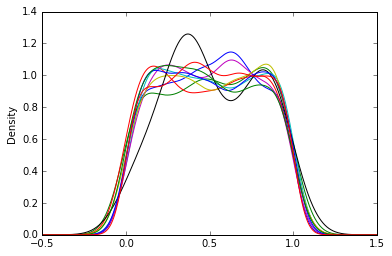

%Of_Household_Income: False


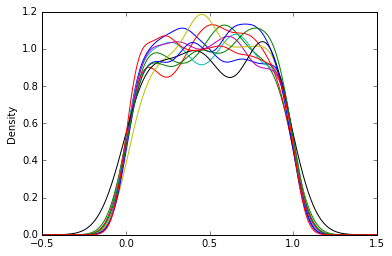

Avg_government_satisfaction: False


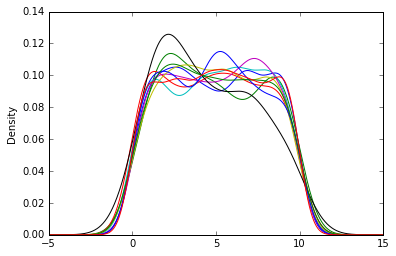

Avg_education_importance: False


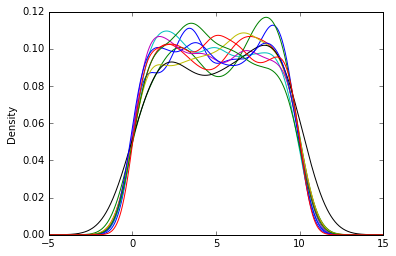

Avg_environmental_importance: False


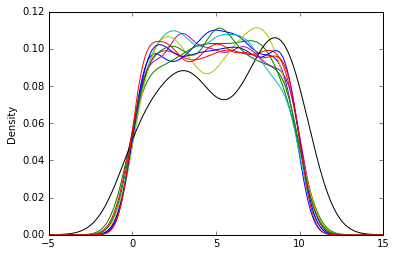

Avg_Satisfaction_with_previous_vote: False


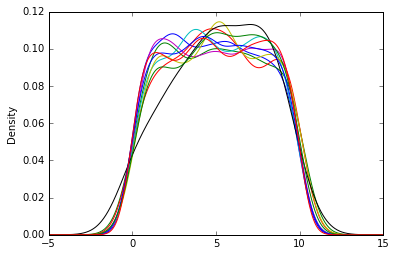

Avg_monthly_income_all_years: False


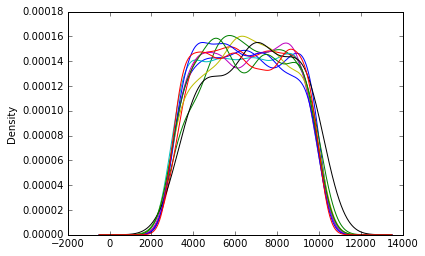

%Time_invested_in_work: False


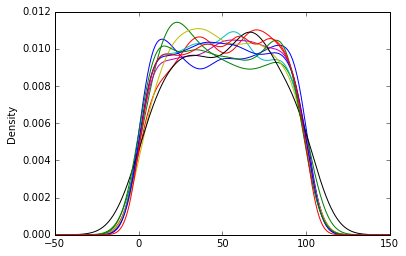

%_satisfaction_financial_policy: False


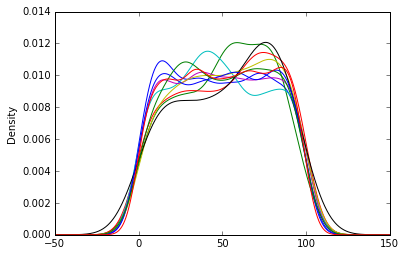

In [21]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt

votes=df.Vote.unique()
votes.sort()

for c in all_features:
    if c not in features_to_keep: #only look at features we still have'nt found any reason to keep    
        if c not in discrete_features: # this is only relevant for non-discrete features
            print c + ": " +  str(c in features_to_keep)
            for vote in votes:                                
                df[df.Vote==vote][c].plot(kind='kde')            
            plt.show()
    

Conclusion: no new evidence to keep one of those features

Avg_monthly_expense_when_under_age_21: True


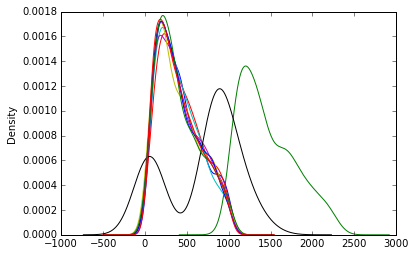

AVG_lottary_expanses: True


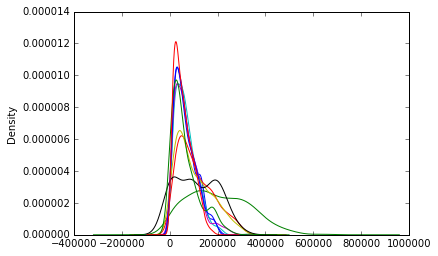

Avg_Residancy_Altitude: True


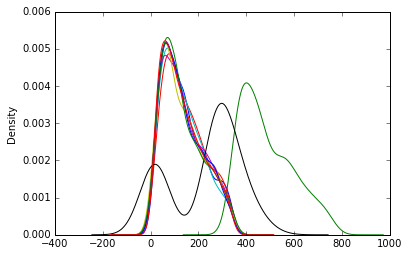

Yearly_ExpensesK: True


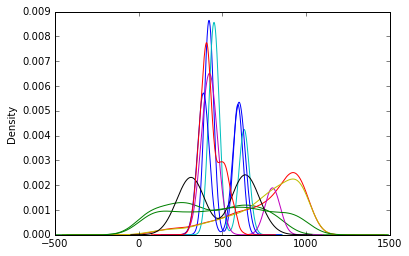

Yearly_IncomeK: True


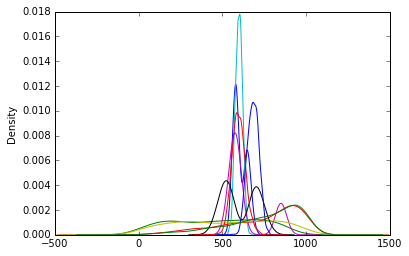

Avg_monthly_expense_on_pets_or_plants: True


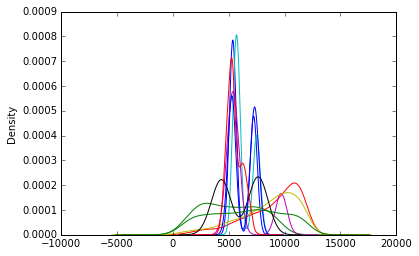

Avg_monthly_household_cost: True


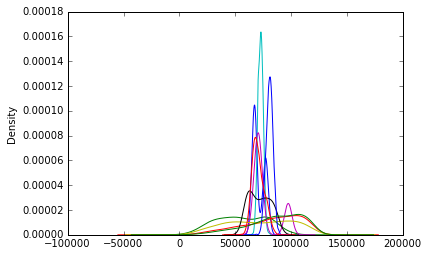

Phone_minutes_10_years: True


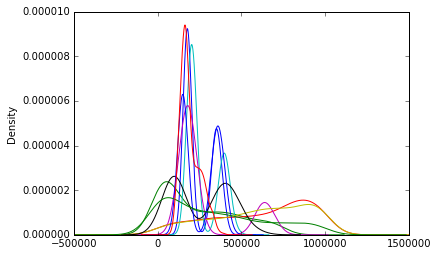

Avg_size_per_room: True


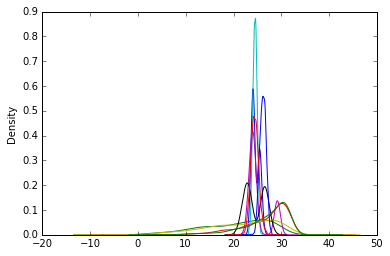

Weighted_education_rank: True


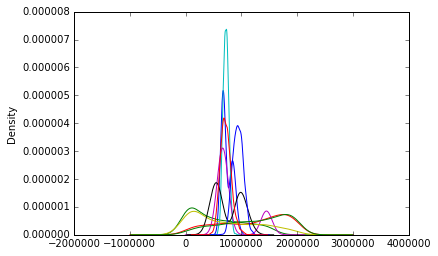

Garden_sqr_meter_per_person_in_residancy_area: True


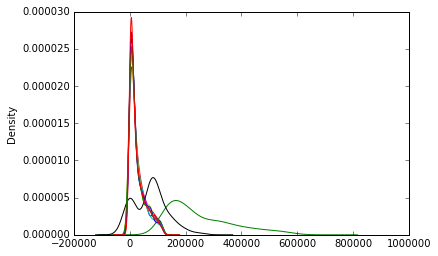

Political_interest_Total_Score: True


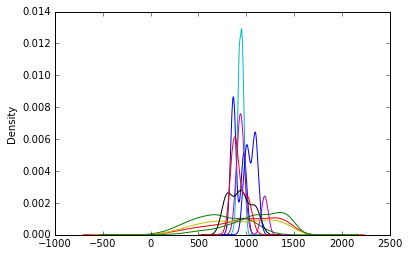

Overall_happiness_score: True


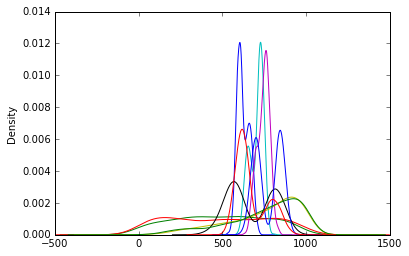

In [22]:
for c in df.columns:
    if c in features_to_keep: # lets see if there are redundant features we decided to keep
        if c not in discrete_features: # this is only relevant for non-discrete features
            print c + ": " +  str(c in features_to_keep)
            for vote in votes:                                
                df[df.Vote==vote][c].plot(kind='kde')            
            plt.show()

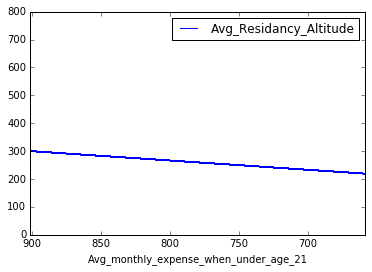

In [23]:
#these 2 look the same
df.plot(x='Avg_monthly_expense_when_under_age_21', y='Avg_Residancy_Altitude')

Yes, they are linearly dependent, so we can drop one of them, and even use it to fill the other one's missing data

In [24]:
features_to_keep

['Most_Important_Issue',
 'Looking_at_poles_results',
 'Married',
 'Will_vote_only_large_party',
 'Financial_agenda_matters',
 'Avg_monthly_expense_when_under_age_21',
 'AVG_lottary_expanses',
 'Avg_Residancy_Altitude',
 'Yearly_ExpensesK',
 'Yearly_IncomeK',
 'Avg_monthly_expense_on_pets_or_plants',
 'Avg_monthly_household_cost',
 'Phone_minutes_10_years',
 'Avg_size_per_room',
 'Weighted_education_rank',
 'Garden_sqr_meter_per_person_in_residancy_area',
 'Last_school_grades',
 'Political_interest_Total_Score',
 'Overall_happiness_score']

In [25]:
features_to_keep.remove('Avg_Residancy_Altitude')

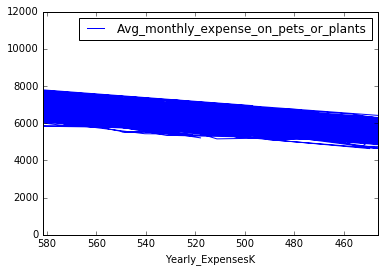

In [26]:
#these two look pretty similar too
df.plot(x='Yearly_ExpensesK', y='Avg_monthly_expense_on_pets_or_plants')

Not sure if thats close enough to drop one of them, let's keep them for now

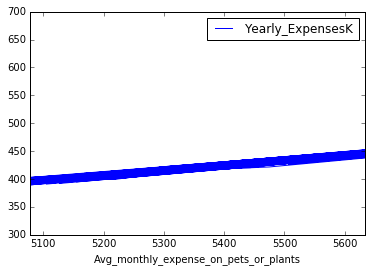

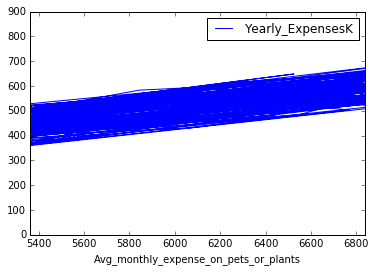

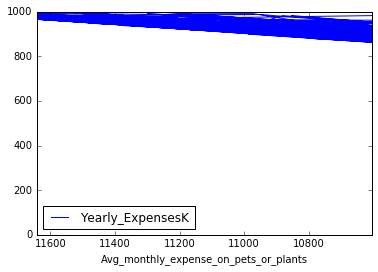

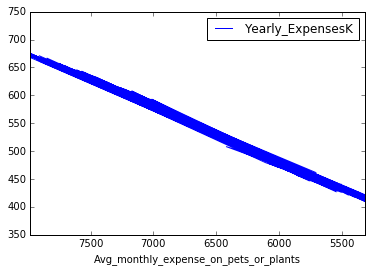

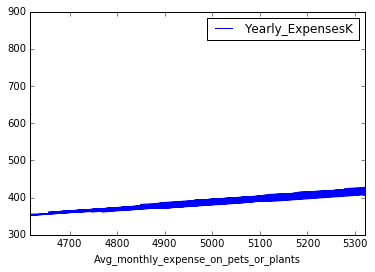

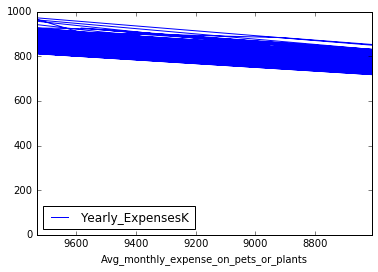

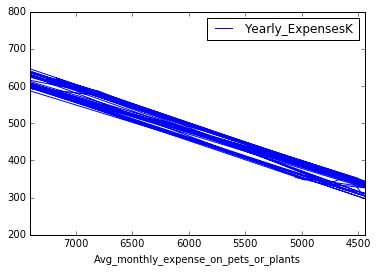

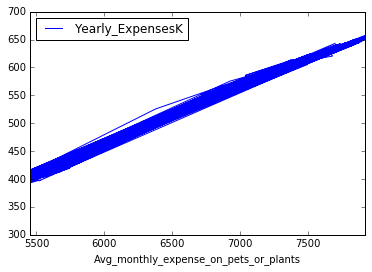

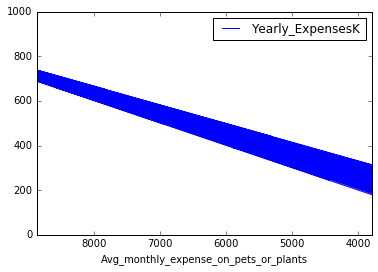

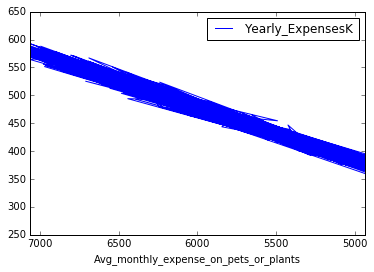

In [27]:
for vote in votes:
    df[df.Vote==vote].plot(y='Yearly_ExpensesK', x='Avg_monthly_expense_on_pets_or_plants')

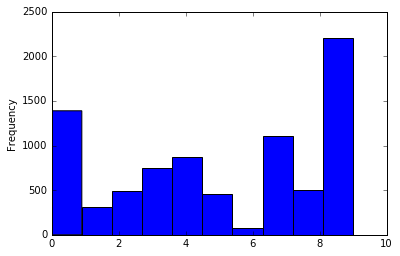

In [28]:
df.Vote.plot(kind='hist')

Occupation_Satisfaction: False


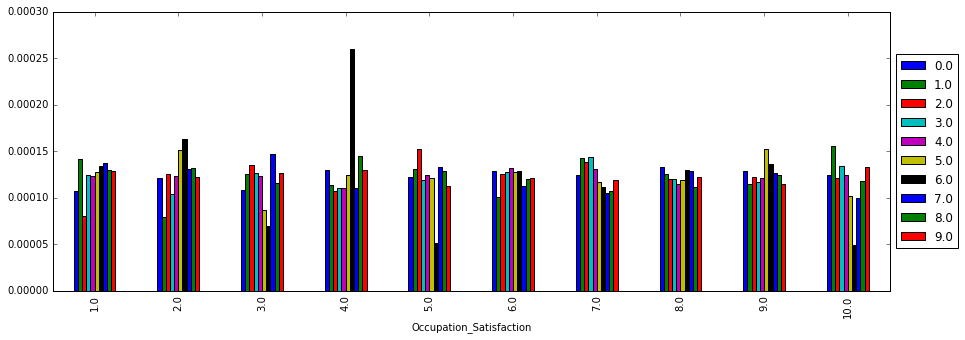

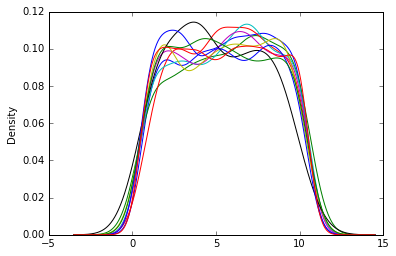

Most_Important_Issue: True


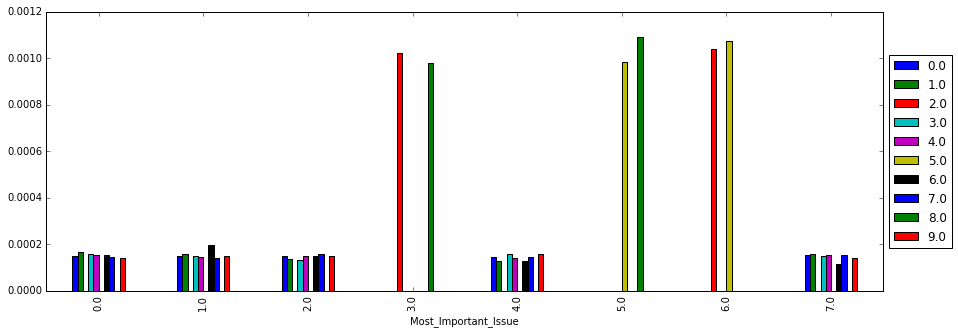

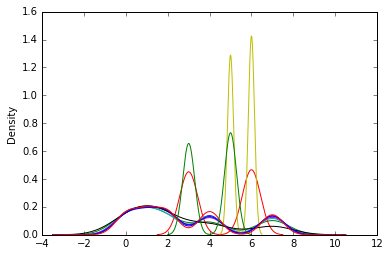

Looking_at_poles_results: True


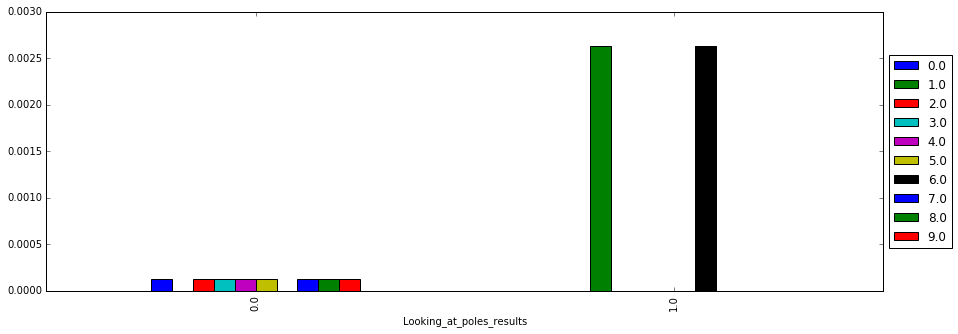

Married: True


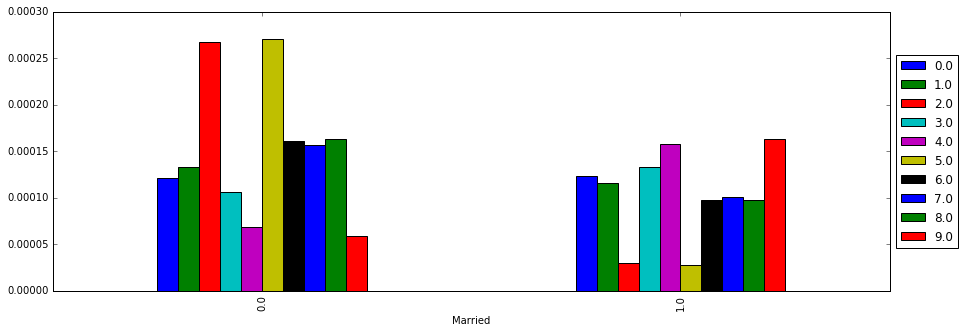

Gender: False


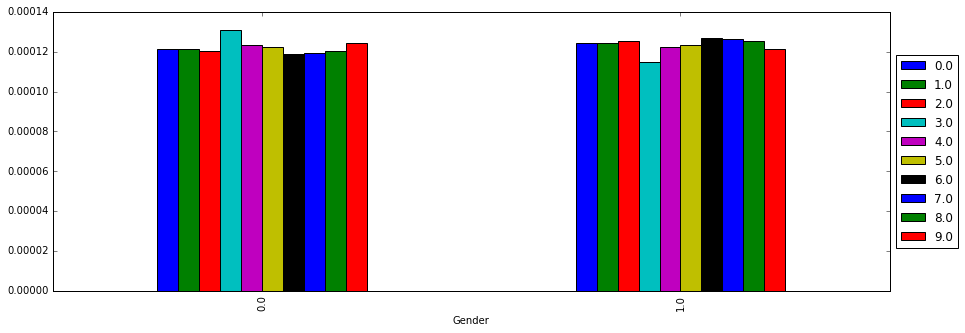

Voting_Time: False


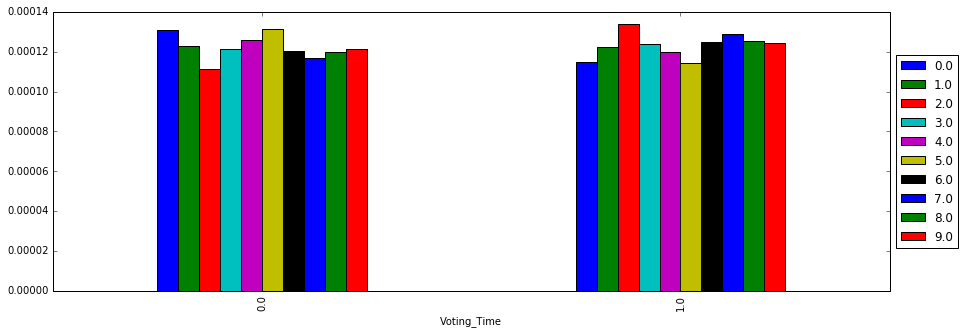

Will_vote_only_large_party: True


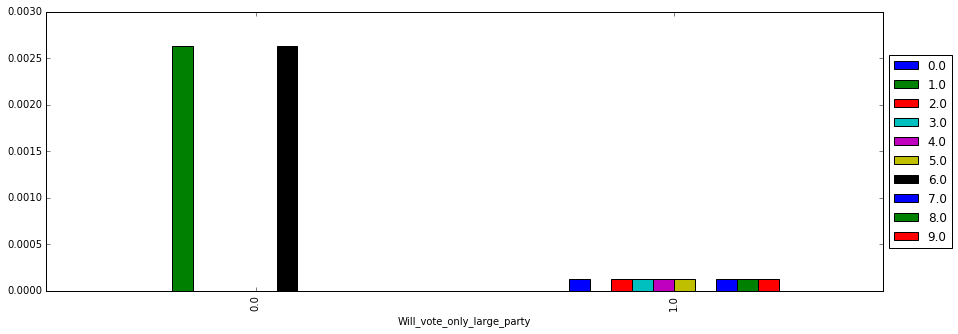

Last_school_grades: True


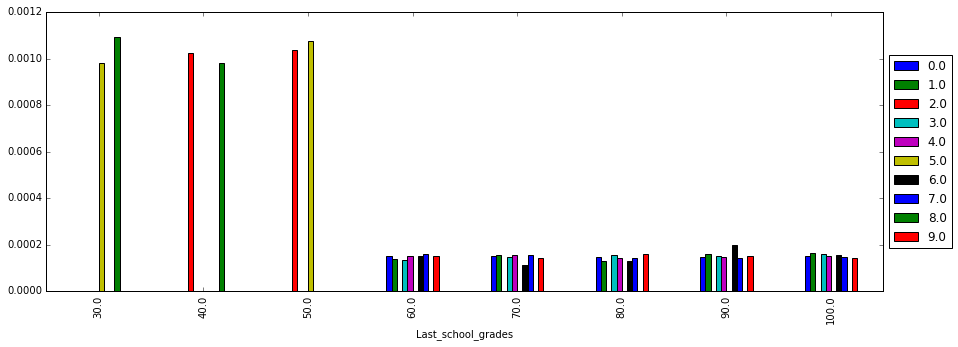

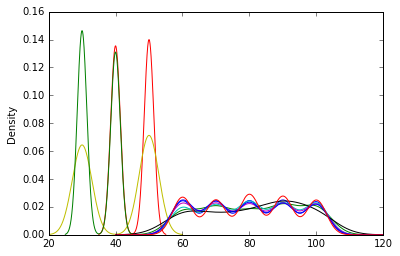

Age_group: False


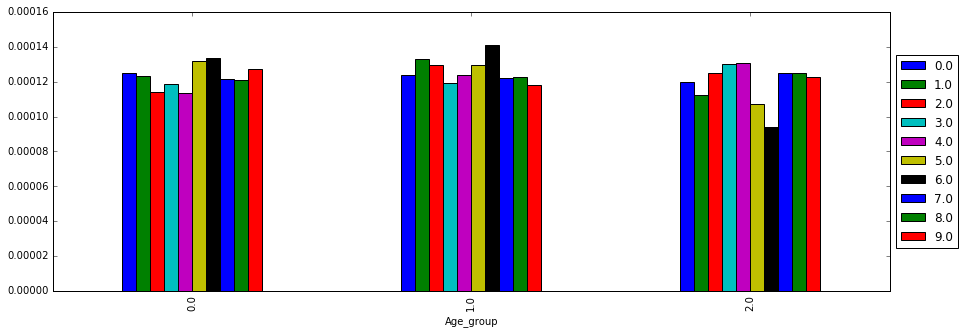

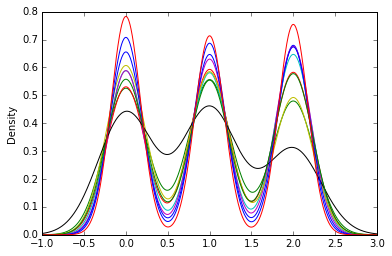

Number_of_differnt_parties_voted_for: False


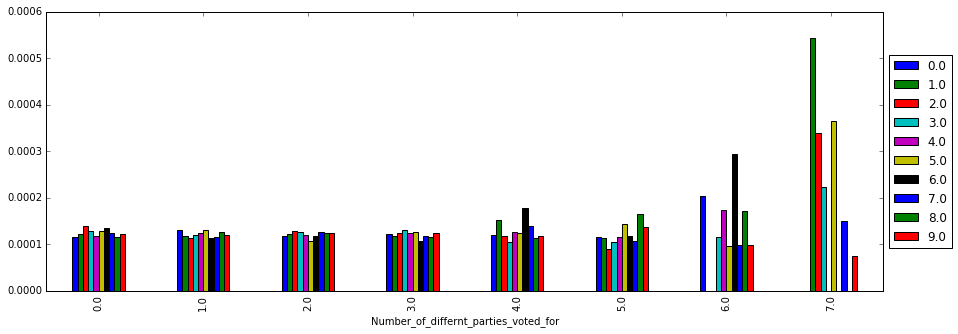

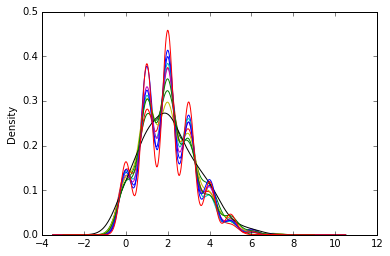

Number_of_valued_Kneset_members: False


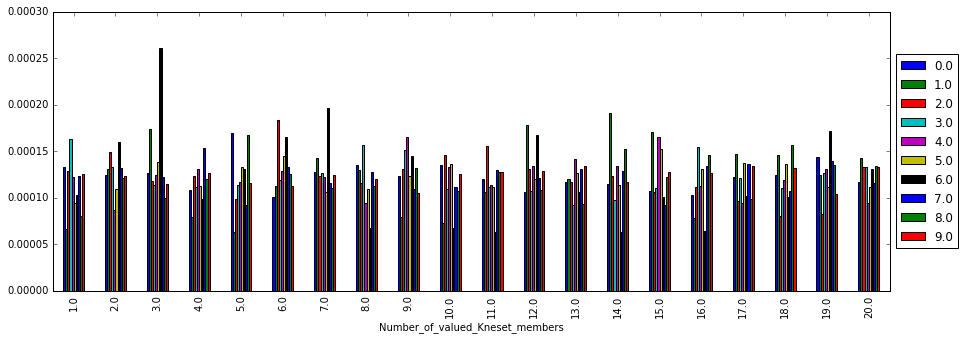

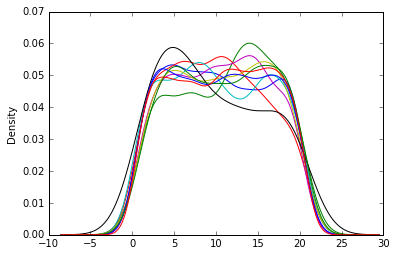

Main_transportation: False


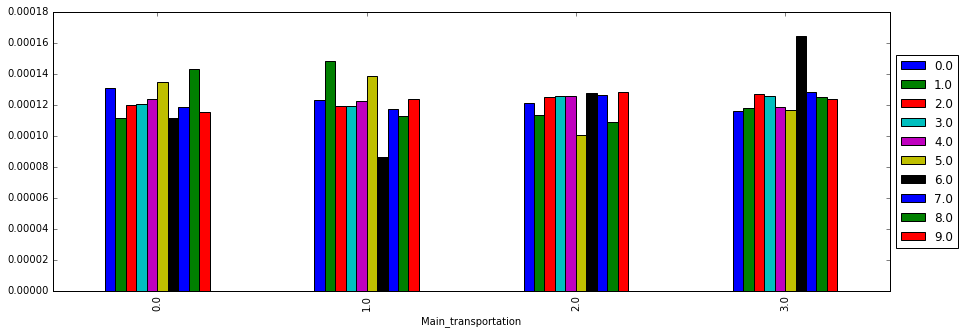

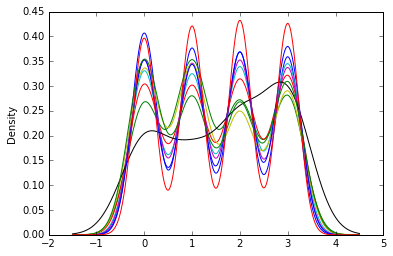

Occupation: False


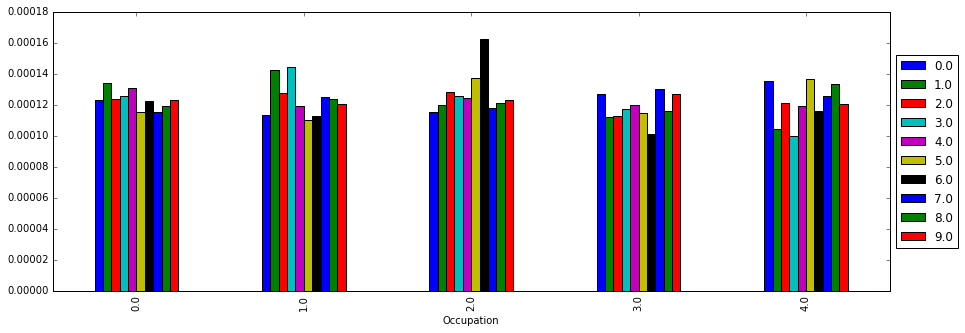

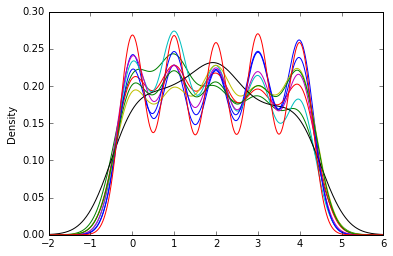

Num_of_kids_born_last_10_years: False


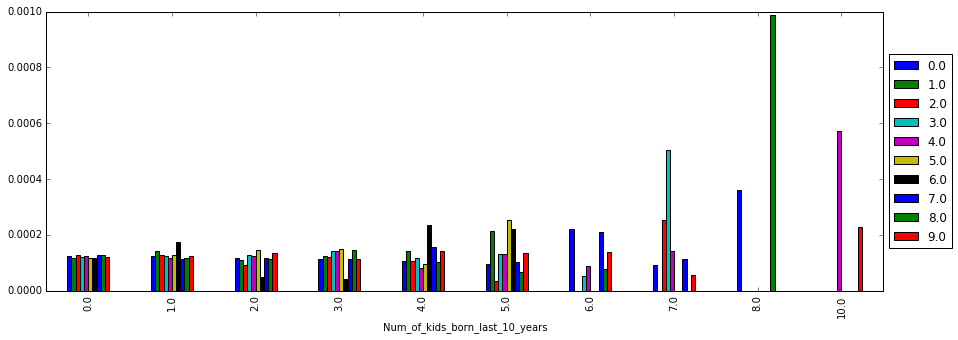

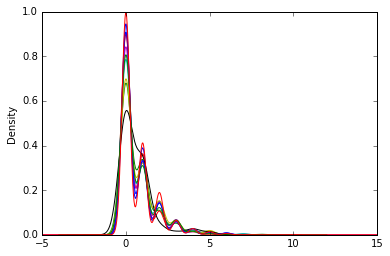

Financial_agenda_matters: True


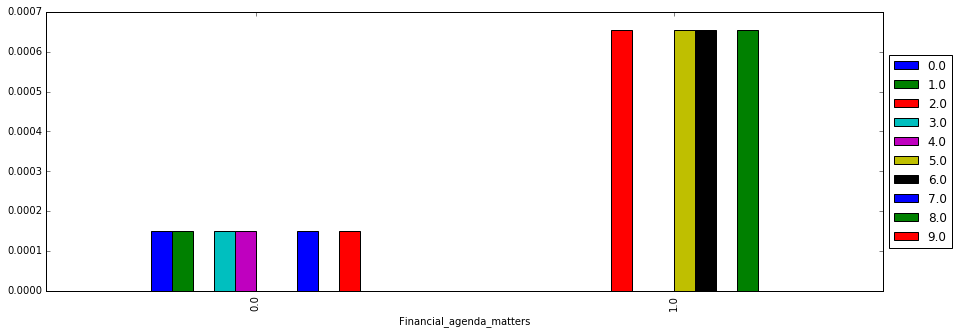

In [29]:
#for discrete features, lets compare histograms of votes between different values
for c in discrete_features:
    print c + ": " +  str(c in features_to_keep)    
    ct = pd.crosstab(df[c], df.Vote)
    ctn=ct.div(ct.sum(axis=1), axis=0).div(ct.sum(axis=0), axis=1) #normalize
    ctn.plot(kind='bar', figsize = (15,5)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()    
    #lets also print the KDEs, maybe it will help    
    if len(df[c].unique())>2:
        for vote in votes:                                        
            df[df.Vote==vote][c].plot(kind='kde')            
    plt.show()

Occupation_Satisfaction- looks different for party 6 when value is 4 and 10, BUT 6 is a very small party, so using this is probably overfitting

Number_of_differnt_parties_voted_for - looks like it does matter, at least for values greater than 4. The qeustion is, do people who voted for a large number of parties tend to vote more for a certain party (party 1 got a very high value with people who voted for 7 different parties) or maybe the histogram looks like this simply because less people have higher values (let's print the histogram), but it doesn't help us predict who will they vote to.
Since the outstanding numbers in the histograms (when exist) are for small parties, and the histograms are very different between the high numbers (the parties with more votes are not consistent) we believe it's just noise.

Num_of_kids_born_last_10_years - same

Last_school_grades - looks like it doesn't matter when 60 or above, we should probably reduce all these values to one. 

Number_of_differnt_parties_voted_for


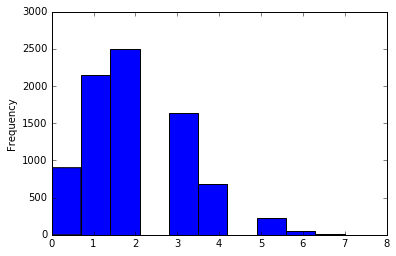

Num_of_kids_born_last_10_years


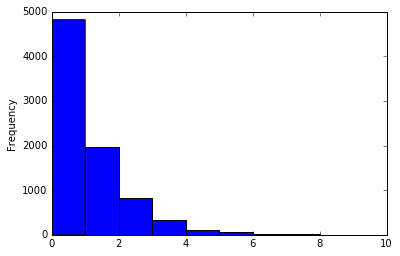

In [30]:
print 'Number_of_differnt_parties_voted_for'
df.Number_of_differnt_parties_voted_for.plot(kind='hist')
plt.show()

print 'Num_of_kids_born_last_10_years'
df.Num_of_kids_born_last_10_years.plot(kind='hist')
plt.show()

So it looks like we were right, and thore features are not important, they weren't included anyway.

In [31]:
# features_to_keep.remove('Last_school_grades') todo

### drop not selected features

In [32]:
not_selected_features = []
for c in df.columns:
    if c not in features_to_keep:
        not_selected_features.append(c)

df_selected_feat_X_noNaN = df.drop(not_selected_features, axis=1).values

In [33]:
print len(df_selected_feat_X_noNaN)
print len(df_Y_noNaN)
print len(df_X_noNaN)
print len(df)

8146
8146
8146
8146


## Wrappers (Features Selection)

### Training Random Forest Classifier - all features

In [34]:
# # Import the random forest package
# from sklearn.ensemble import RandomForestClassifier 
# from sklearn.cross_validation import train_test_split
# from sklearn import metrics

# # Prepare train and test data using cross validation
# X_train_noNaN, X_test_noNaN, y_train_noNaN, y_test_noNaN = train_test_split(df_X_noNaN, 
#                                                                             df_Y_noNaN) 
                                                                            

# # Create the random forest object which will include all the parameters
# # for the fit
# forest = RandomForestClassifier(n_estimators = 3)

# # Fit the training data to the Survived labels and create the decision trees
# forest = forest.fit(df_X_noNaN,df_Y_noNaN)

# # output = forest.predict(test_data_noNaN)
# y_pred_noNaN = forest.predict(X_test_noNaN)

# print "accuracy:", metrics.accuracy_score(y_test_noNaN, y_pred_noNaN)
# print "precision:", metrics.precision_score(y_test_noNaN, y_pred_noNaN)
# print "recall:", metrics.recall_score(y_test_noNaN, y_pred_noNaN)
# print "f1 score:", metrics.f1_score(y_test_noNaN, y_pred_noNaN)

### Training Random Forest Classifier - selected features

In [35]:
# # Prepare train and test data using cross validation
# X_train_noNaN, X_test_noNaN, y_train_noNaN, y_test_noNaN = train_test_split(df_selected_feat_X_noNaN, 
#                                                                             df_Y_noNaN) 
                                                                            

# # Create the random forest object which will include all the parameters
# # for the fit
# forest = RandomForestClassifier(n_estimators = 3)

# # Fit the training data to the Survived labels and create the decision trees
# forest = forest.fit(df_selected_feat_X_noNaN,df_Y_noNaN)

# # output = forest.predict(test_data_noNaN)
# y_pred_noNaN = forest.predict(X_test_noNaN)

# print "accuracy:", metrics.accuracy_score(y_test_noNaN, y_pred_noNaN)
# print "precision:", metrics.precision_score(y_test_noNaN, y_pred_noNaN)
# print "recall:", metrics.recall_score(y_test_noNaN, y_pred_noNaN)
# print "f1 score:", metrics.f1_score(y_test_noNaN, y_pred_noNaN)

### Create a K-Folds cross validation iterator

In [36]:
from sklearn.cross_validation import KFold

n_folds=5
kf = KFold(n=df_X_noNaN.shape[0], n_folds=n_folds)

print(kf) 

sklearn.cross_validation.KFold(n=8146, n_folds=5, shuffle=False, random_state=None)


### Train/Test Random Forest and SVM usin K-Fold cross validation - all features

In [37]:
# from sklearn.svm import SVC

# for k, (train_index, test_index) in enumerate(kf):
#     # Random Forest
#     forest = forest.fit(df_X_noNaN[train_index], df_Y_noNaN[train_index])
#     y_pred_noNaN_RF = forest.predict(df_X_noNaN[test_index])
#     #SVM
#     clf = SVC().fit(df_X_noNaN[train_index], df_Y_noNaN[train_index])
#     y_pred_noNaN_SVM = clf.predict(df_X_noNaN[test_index])
    
#     #results    
#     print("[fold {0}] RF score: {1:.5}, SVM score: {2:.5}".
#           format(k, metrics.accuracy_score(df_Y_noNaN[test_index],y_pred_noNaN_RF), 
#                  metrics.accuracy_score(df_Y_noNaN[test_index], y_pred_noNaN_SVM)))

### Train/Test Random Forest and SVM usin K-Fold cross validation - selected features

In [38]:
# for k, (train_index, test_index) in enumerate(kf):
#     # Random Forest
#     forest = forest.fit(df_selected_feat_X_noNaN[train_index], df_Y_noNaN[train_index])
#     y_pred_noNaN_RF = forest.predict(df_selected_feat_X_noNaN[test_index])
#     #SVM
#     clf = SVC().fit(df_selected_feat_X_noNaN[train_index], df_Y_noNaN[train_index])
#     y_pred_noNaN_SVM = clf.predict(df_selected_feat_X_noNaN[test_index])
    
#     #results    
#     print("[fold {0}] RF score: {1:.5}, SVM score: {2:.5}".
#           format(k, metrics.accuracy_score(df_Y_noNaN[test_index],y_pred_noNaN_RF), 
#                  metrics.accuracy_score(df_Y_noNaN[test_index], y_pred_noNaN_SVM)))

similar features:
Avg_monthly_expense_when_under_age_21
AVG_lottary_expanses
Garden_sqr_meter_per_person_in_residancy_area


Yearly_ExpensesK
Yearly_IncomeK
Avg_monthly_expense_on_pets_or_plants
Avg_monthly_household_cost
Phone_minutes_10_years
Avg_size_per_room
Weighted_education_rank
Political_interest_Total_Score
Overall_happiness_score

In [39]:
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier 
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC, LinearSVC
      
classifiers = {
    "Nearest Neighbors": KNeighborsClassifier(15),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Perceptron": Perceptron(n_iter=50),
#     "Linear SVM OVO": SVC(kernel="linear", C=1),
    "Linear SVM OVR": LinearSVC(C=1),
    "Random Forest": RandomForestClassifier(n_estimators = 3)
    }

def wrappersTest(X, Y, kf): 
    res = {}
    for name, clf in classifiers.iteritems():
        score_sum=0 
        print 'start ' + str(name) + ' test..'
        for k, (train_index, test_index) in enumerate(kf):            
            clf.fit(X[train_index], Y[train_index])            
            acc = clf.score(X[test_index],Y[test_index])
            score_sum += acc                 
            print("[fold {0}] {1} score: {2:.5}".format(k, name, acc))
        print("{0} average score: {1:.5}".format(name, score_sum/n_folds))
        res[name] = score_sum/n_folds
    return res

In [46]:
n_folds=5
kf = KFold(n=len(df), n_folds=n_folds)
similar_features=['Avg_monthly_expense_when_under_age_21', 'AVG_lottary_expanses', 'Garden_sqr_meter_per_person_in_residancy_area']

def evaulate_features(df):
    res = {}
    print 'Wrappers score with all selected features:'
    res['all'] = wrappersTest(df[features_to_keep].values, df_Y_noNaN, kf)
    
    print 'Wrappers score without similar_features:'
    res['withou similar_features'] = wrappersTest(df[features_to_keep].drop(similar_features, axis=1).values, df_Y_noNaN, kf)

    for s in similar_features:   
        print 'Wrappers score without ' + str(s) + ':'
        res[s] = wrappersTest(df[features_to_keep].drop(s, axis=1).values, df_Y_noNaN, kf)
        
    return res

pd.DataFrame.from_dict(evaulate_features(df))

Wrappers score with all selected features:
start Decision Tree test..
Decision Tree average score: 0.69187
start Naive Bayes test..
Naive Bayes average score: 0.55708
start Linear SVM OVR test..
Linear SVM OVR average score: 0.28664
start Perceptron test..
Perceptron average score: 0.23496
start Random Forest test..
Random Forest average score: 0.83661
start Nearest Neighbors test..
Nearest Neighbors average score: 0.61564
Wrappers score without similar_features:
start Decision Tree test..
Decision Tree average score: 0.69568
start Naive Bayes test..
Naive Bayes average score: 0.53658
start Linear SVM OVR test..
Linear SVM OVR average score: 0.14901
start Perceptron test..
Perceptron average score: 0.20022
start Random Forest test..
Random Forest average score: 0.84225
start Nearest Neighbors test..
Nearest Neighbors average score: 0.61183
Wrappers score without Avg_monthly_expense_when_under_age_21:
start Decision Tree test..
Decision Tree average score: 0.69175
start Naive Bayes test

,AVG_lottary_expanses,Avg_monthly_expense_when_under_age_21,Garden_sqr_meter_per_person_in_residancy_area,all,withou similar_features
Decision Tree,0.691751,0.691751,0.691629,0.691874,0.695679
Linear SVM OVR,0.189544,0.182053,0.192728,0.286640,0.149013
Naive Bayes,0.563958,0.552910,0.556838,0.557084,0.536582
Nearest Neighbors,0.621042,0.615640,0.609625,0.615640,0.611835
Perceptron,0.234231,0.228336,0.230546,0.234959,0.200224
Random Forest,0.836484,0.834029,0.839430,0.836605,0.842253


### Lets normalize and try again

In [41]:
df_standart=df[features_to_keep]
for c in df_standart.columns:
    if c not in discrete_features:
        mean = df_standart[c].mean()
        std=df_standart[c].std()
        df_standart[c]=df_standart[c].map(lambda x: (x-mean)/std )

/Users/Itay/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [42]:
df_standart.describe()

,Most_Important_Issue,Looking_at_poles_results,Married,Will_vote_only_large_party,Financial_agenda_matters,Avg_monthly_expense_when_under_age_21,AVG_lottary_expanses,Yearly_ExpensesK,Yearly_IncomeK,Avg_monthly_expense_on_pets_or_plants,Avg_monthly_household_cost,Phone_minutes_10_years,Avg_size_per_room,Weighted_education_rank,Garden_sqr_meter_per_person_in_residancy_area,Last_school_grades,Political_interest_Total_Score,Overall_happiness_score
count,8146.00000,8146.000000,8146.000000,8146.000000,8146.000000,8.146000e+03,8.146000e+03,8.146000e+03,8.146000e+03,8.146000e+03,8.146000e+03,8.146000e+03,8.146000e+03,8.146000e+03,8.146000e+03,8146.000000,8.146000e+03,8.146000e+03
mean,3.12988,0.046649,0.609502,0.953351,0.187454,-1.561345e-16,3.332032e-16,3.366922e-16,4.718925e-16,2.616779e-18,7.370594e-16,9.856534e-17,-9.123836e-16,-4.640422e-16,1.181912e-16,72.838203,-3.731091e-16,1.727074e-16
std,2.40249,0.210898,0.487892,0.210898,0.390299,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,20.203327,1.000000e+00,1.000000e+00
min,0.00000,0.000000,0.000000,0.000000,0.000000,-1.343576e+00,-1.202381e+00,-2.935836e+00,-4.432727e+00,-3.213990e+00,-4.910091e+00,-1.406657e+00,-7.328736e+00,-2.394871e+00,-6.158823e-01,30.000000,-5.174883e+00,-4.391174e+00
25%,1.00000,0.000000,0.000000,1.000000,0.000000,-7.535181e-01,-7.140770e-01,-5.999990e-01,-3.549605e-01,-5.811208e-01,-4.359081e-01,-6.083700e-01,-2.501601e-01,-4.652404e-01,-5.363890e-01,60.000000,-4.322832e-01,-4.489450e-01
50%,3.00000,0.000000,1.000000,1.000000,0.000000,-2.424552e-01,-2.653892e-01,-3.516601e-01,-1.070852e-01,-3.536090e-01,-9.429250e-02,-4.297668e-01,-2.871277e-02,-2.240447e-01,-3.459242e-01,70.000000,-3.659231e-02,4.609255e-03
75%,5.00000,0.000000,1.000000,1.000000,0.000000,5.364743e-01,4.262983e-01,5.201723e-01,3.317117e-01,5.065686e-01,3.822413e-01,3.398869e-01,3.482995e-01,2.377018e-01,1.615200e-01,90.000000,3.927097e-01,5.875849e-01
max,7.00000,1.000000,1.000000,1.000000,1.000000,5.599997e+00,9.162726e+00,2.861983e+00,2.677899e+00,3.062808e+00,3.175488e+00,3.506420e+00,2.120571e+00,3.461672e+00,9.853473e+00,100.000000,3.069005e+00,2.074465e+00


In [47]:
pd.DataFrame.from_dict(evaulate_features(df_standart))

Wrappers score with all selected features:
start Decision Tree test..
Decision Tree average score: 0.692
start Naive Bayes test..
Naive Bayes average score: 0.61625
start Linear SVM OVR test..
Linear SVM OVR average score: 0.51706
start Perceptron test..
Perceptron average score: 0.38214
start Random Forest test..
Random Forest average score: 0.83084
start Nearest Neighbors test..
Nearest Neighbors average score: 0.77167
Wrappers score without similar_features:
start Decision Tree test..
Decision Tree average score: 0.69568
start Naive Bayes test..
Naive Bayes average score: 0.61613
start Linear SVM OVR test..
Linear SVM OVR average score: 0.53352
start Perceptron test..
Perceptron average score: 0.36177
start Random Forest test..
Random Forest average score: 0.83857
start Nearest Neighbors test..
Nearest Neighbors average score: 0.82801
Wrappers score without Avg_monthly_expense_when_under_age_21:
start Decision Tree test..
Decision Tree average score: 0.692
start Naive Bayes test..
N

{'AVG_lottary_expanses': {'Decision Tree': 0.69187419735092859,
  'Linear SVM OVR': 0.5591677682495565,
  'Naive Bayes': 0.61600793892899774,
  'Nearest Neighbors': 0.78455742730494449,
  'Perceptron': 0.34702821182026689,
  'Random Forest': 0.83685312604744522},
 'Avg_monthly_expense_when_under_age_21': {'Decision Tree': 0.69199697205933863,
  'Linear SVM OVR': 0.50785931374210525,
  'Naive Bayes': 0.61551676477345052,
  'Nearest Neighbors': 0.78725847088996603,
  'Perceptron': 0.41737796909542152,
  'Random Forest': 0.8400448165346649},
 'Garden_sqr_meter_per_person_in_residancy_area': {'Decision Tree': 0.69175142264251843,
  'Linear SVM OVR': 0.54492183469101074,
  'Naive Bayes': 0.61527144132235134,
  'Nearest Neighbors': 0.77756107665133867,
  'Perceptron': 0.38361582814553696,
  'Random Forest': 0.83783389259849295},
 'all': {'Decision Tree': 0.69199697205933863,
  'Linear SVM OVR': 0.51706206901746332,
  'Naive Bayes': 0.61625333770200397,
  'Nearest Neighbors': 0.77166834257909